In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Tuple

import plot_settings
import plot_utils

In [139]:
from importlib import reload

In [140]:
reload(plot_utils), reload(plot_settings)

(<module 'plot_utils' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_utils.py'>,
 <module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>)

In [141]:
results = pd.read_csv("../political_compass_results.csv")
results = results[results.prompt_name == "neutral"]  # start with the basic prompts
results.head()

,Unnamed: 0,model,prompt_name,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
0,0,gpt2,neutral,1.005,0.280,0.38,-3.08,1.63,3.64
12,12,bert-base-uncased,neutral,1.810,0.590,5.25,0.51,-1.63,0.67
24,24,bert-large-uncased,neutral,0.810,1.100,3.50,-0.31,-1.88,2.51
36,36,facebook/bart-base,neutral,-0.190,-0.205,-0.88,-3.85,0.50,3.44
48,48,facebook/bart-large,neutral,0.940,-0.615,0.63,-3.44,1.25,2.21


In [142]:
forward_scores = {row.model: (row.forward_economic_score, row.forward_social_score) for row in results.itertuples()}

In [143]:
reload(plot_settings)

<module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>

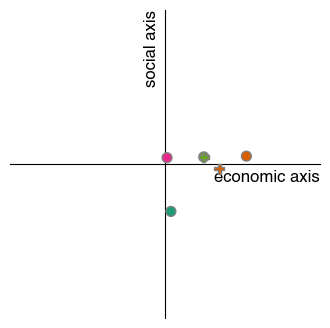

In [144]:
%matplotlib inline
plot_utils.make_conventional_plot(
    forward_scores, 
    ["gpt2", "bert-base-uncased", "bert-large-uncased", "roberta-base", "roberta-large", "meta-llama/Llama-2-7b-hf"],
    max_range=10
)
plt.show()

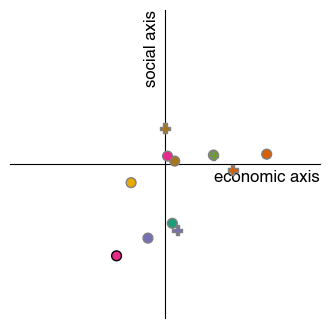

In [145]:
plot_utils.make_conventional_plot(
    forward_scores, max_range=8
)
plt.show()

In [151]:
reload(plot_utils), reload(plot_settings)

(<module 'plot_utils' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_utils.py'>,
 <module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>)

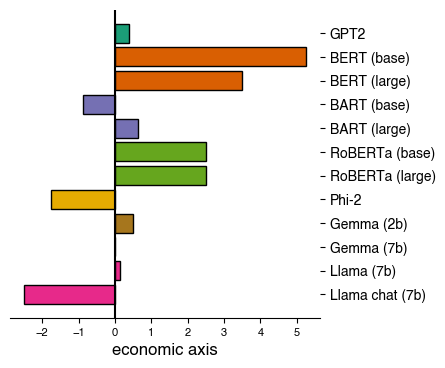

In [152]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: forward_scores[m][0] for m in forward_scores}, metric="economic_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

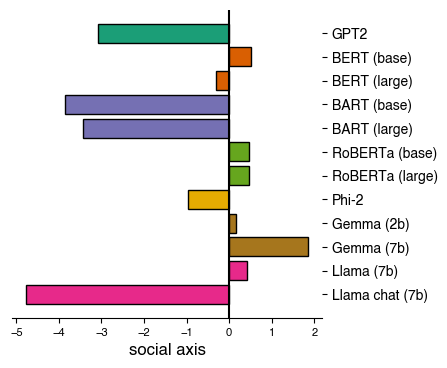

In [153]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: forward_scores[m][1] for m in forward_scores}, metric="social_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

In [84]:
combo_scores = {row.model: (row.average_economic_score, row.average_social_score) for row in results.itertuples()}

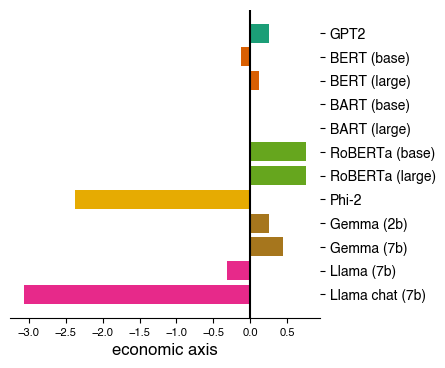

In [85]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: combo_scores[m][0] for m in forward_scores}, metric="economic_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

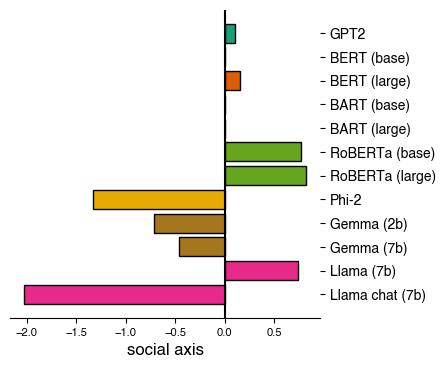

In [154]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: combo_scores[m][1] for m in forward_scores}, metric="social_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

In [155]:
reload(plot_settings), reload(plot_utils)


(<module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>,
 <module 'plot_utils' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_utils.py'>)

None 0
// 1


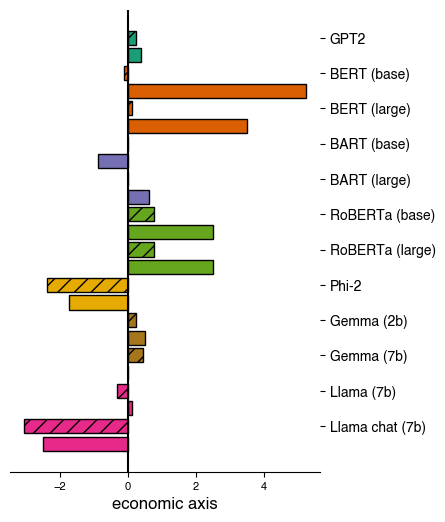

In [156]:
%matplotlib inline

ax = plot_utils.make_alternating_horizontal_barplot(
    {m: [forward_scores[m][0], combo_scores[m][0]] for m in forward_scores}, textures=[None, "//"], metric="economic_score"
)
plt.show()

None 0
// 1


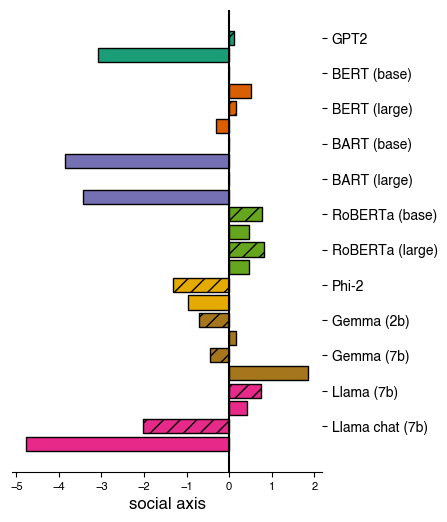

In [157]:
%matplotlib inline

ax = plot_utils.make_alternating_horizontal_barplot(
    {m: [forward_scores[m][1], combo_scores[m][1]] for m in forward_scores}, textures=[None, "//"], metric="social_score"
)
plt.show()